In [1]:
#Importing the necessary tools and packages for the project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

# Machine Learning Skills 

### First look at the data

###### Importing the dataset and making an explaratory data analysis

In [2]:
df = pd.read_csv("data1.csv",sep=";")
df.head()

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
0,128,415,3824657,no,yes,25,265,45,17,110,197,87,"244,7",91,"11,01",10,3,"2,7",1,0
1,107,415,3717191,no,yes,26,162,27,17,123,196,103,"254,4",103,"11,45","13,7",3,"3,7",1,0
2,137,415,3581921,no,no,0,243,41,10,114,121,110,"162,6",104,"7,32","12,2",5,"3,29",0,0
3,84,408,3759999,yes,no,0,299,51,5,71,62,88,"196,9",89,"8,86","6,6",7,"1,78",2,0
4,75,415,3306626,yes,no,0,167,28,13,113,148,122,"186,9",121,"8,41","10,1",3,"2,73",3,0


In [3]:
df.columns

Index(['account length', 'location code', 'user id', 'credit card info save',
       'push status', 'add to wishlist', 'desktop sessions', 'app sessions',
       'desktop transactions', 'total product detail views',
       'session duration', 'promotion clicks', 'avg order value',
       'sale product views', 'discount rate per visited products',
       'product detail view per app session', 'app transactions',
       'add to cart per session', 'customer service calls', 'churn'],
      dtype='object')

In [4]:
df.shape

(3333, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   account length                       3333 non-null   int64 
 1   location code                        3333 non-null   int64 
 2   user id                              3333 non-null   int64 
 3   credit card info save                3333 non-null   object
 4   push status                          3333 non-null   object
 5   add to wishlist                      3333 non-null   int64 
 6   desktop sessions                     3333 non-null   int64 
 7   app sessions                         3333 non-null   int64 
 8   desktop transactions                 3333 non-null   int64 
 9   total product detail views           3333 non-null   int64 
 10  session duration                     3333 non-null   int64 
 11  promotion clicks                     3333 n

In [6]:
df.describe()

,account length,location code,user id,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,sale product views,app transactions,customer service calls,churn
count,3333.000000,3333.000000,3.333000e+03,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,3.746291e+06,8.099010,179.811881,30.567957,17.087609,100.435644,201.039604,100.110711,100.107711,4.479448,1.562856,0.144914
std,39.822106,42.371290,2.746626e+05,13.688365,54.457135,9.269376,4.323795,20.069084,50.714359,19.923911,19.568609,2.461214,1.315491,0.352067
min,1.000000,408.000000,3.271058e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,3.508680e+06,0.000000,144.000000,24.000000,14.000000,87.000000,167.000000,87.000000,87.000000,3.000000,1.000000,0.000000
50%,101.000000,415.000000,3.748187e+06,0.000000,179.000000,31.000000,17.000000,101.000000,201.000000,100.000000,100.000000,4.000000,1.000000,0.000000
75%,127.000000,510.000000,3.985970e+06,20.000000,216.000000,37.000000,20.000000,114.000000,235.000000,114.000000,113.000000,6.000000,2.000000,0.000000
max,243.000000,510.000000,4.229964e+06,51.000000,351.000000,60.000000,31.000000,165.000000,364.000000,170.000000,175.000000,20.000000,9.000000,1.000000


#### Correlation matrix and correlation map

In [7]:
correlation = df.corr()
correlation

,account length,location code,user id,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,sale product views,app transactions,customer service calls,churn
account length,1.000000,-0.012463,0.004808,-0.004628,0.006191,0.007158,-0.007882,0.038470,-0.006790,0.019136,-0.013176,0.020661,-0.003796,0.016541
location code,-0.012463,1.000000,-0.014029,-0.001994,-0.008390,-0.007940,0.003712,-0.009646,0.003894,-0.011791,0.016522,-0.024179,0.027572,0.006174
user id,0.004808,-0.014029,1.000000,0.022569,0.012035,0.011246,-0.017838,-0.005812,-0.017708,0.003468,0.014034,-0.017676,0.033847,0.005730
add to wishlist,-0.004628,-0.001994,0.022569,1.000000,0.001005,0.000030,0.019325,-0.009548,0.017443,-0.006087,0.007123,0.013957,-0.013263,-0.089728
desktop sessions,0.006191,-0.008390,0.012035,0.001005,1.000000,0.999498,0.006033,0.006561,0.007216,0.015495,0.023060,0.008148,-0.013432,0.205138
app sessions,0.007158,-0.007940,0.011246,0.000030,0.999498,1.000000,0.005752,0.006363,0.006943,0.015923,0.022918,0.008017,-0.012835,0.204683
desktop transactions,-0.007882,0.003712,-0.017838,0.019325,0.006033,0.005752,1.000000,-0.019646,0.997815,-0.009742,0.007323,0.000874,-0.014265,0.091811
total product detail views,0.038470,-0.009646,-0.005812,-0.009548,0.006561,0.006363,-0.019646,1.000000,-0.021409,0.006376,-0.019557,0.004574,-0.018942,0.018459
session duration,-0.006790,0.003894,-0.017708,0.017443,0.007216,0.006943,0.997815,-0.021409,1.000000,-0.011477,0.007613,0.002697,-0.012971,0.092783
promotion clicks,0.019136,-0.011791,0.003468,-0.006087,0.015495,0.015923,-0.009742,0.006376,-0.011477,1.000000,0.007793,0.017541,0.002500,0.009307


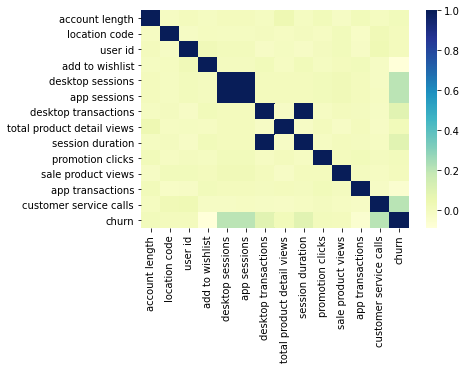

In [8]:
sns.heatmap(correlation, cmap="YlGnBu")
plt.show()

It is not surprising that the most correlated features are 'app sessions' and 'desktop sessions'.

In [9]:
df['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

###### Checking for missing values and cleaning the data

In [10]:
df.isna().any()

account length                         False
location code                          False
user id                                False
credit card info save                  False
push status                            False
add to wishlist                        False
desktop sessions                       False
app sessions                           False
desktop transactions                   False
total product detail views             False
session duration                       False
promotion clicks                       False
avg order value                        False
sale product views                     False
discount rate per visited products     False
product detail view per app session    False
app transactions                       False
add to cart per session                False
customer service calls                 False
churn                                  False
dtype: bool

At this point dataframe seems to not including any missing values however it has to be cleaned and getting into a feauture selection process to perform a better model.

#### Exploring the features and checking for binarity

In [11]:
columns = df.columns
binary_cols = []
for col in columns:
    if df[col].value_counts().shape[0] == 2:
        binary_cols.append(col)

In [12]:
#Categorical variables with only two classes
binary_cols

['credit card info save', 'push status', 'churn']

So, that is to say that remaining variables are not binary ones and have more than two classes.

#### Checking for the class ditribution of binary categorical variables

<AxesSubplot:xlabel='churn', ylabel='count'>

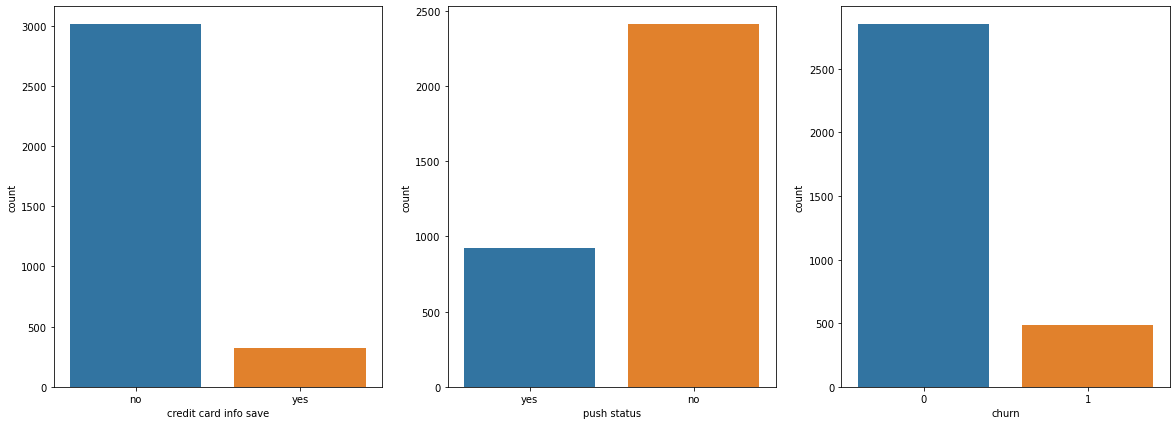

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

sns.countplot("credit card info save", data=df, ax=axes[0])
sns.countplot("push status", data=df, ax=axes[1])
sns.countplot("churn", data=df, ax=axes[2])

Almost all three features are higly imbalanced.

In [14]:
df[['credit card info save','churn']].groupby(['credit card info save']).mean()

,churn
credit card info save,
no,0.114950
yes,0.424149


In [15]:
df[['push status','churn']].groupby(['push status']).mean()

,churn
push status,
no,0.167151
yes,0.086768


The noticable differences between average churn rates for both features:'push status' and 'credit card info save' show that both
    of the features are strong indicators regarding the prediction power of our model.

##### Converting object type numerical features to float increase the efficiency of the model

In [16]:
df["avg order value"] = df["avg order value"].str.replace(",",".")
df["avg order value"] = df["avg order value"].astype('float')

In [17]:
df["discount rate per visited products"] = df["discount rate per visited products"].str.replace(",",".")
df["discount rate per visited products"] = df["discount rate per visited products"].astype('float')

In [18]:
df["add to cart per session"] = df["add to cart per session"].str.replace(",",".")
df["add to cart per session"] = df["add to cart per session"].astype('float')

In [19]:
df["product detail view per app session"] = df["product detail view per app session"].str.replace(",",".")
df["product detail view per app session"] = df["product detail view per app session"].astype('float')

In [20]:
df.dtypes

account length                           int64
location code                            int64
user id                                  int64
credit card info save                   object
push status                             object
add to wishlist                          int64
desktop sessions                         int64
app sessions                             int64
desktop transactions                     int64
total product detail views               int64
session duration                         int64
promotion clicks                         int64
avg order value                        float64
sale product views                       int64
discount rate per visited products     float64
product detail view per app session    float64
app transactions                         int64
add to cart per session                float64
customer service calls                   int64
churn                                    int64
dtype: object

##### Continuous features

<AxesSubplot:xlabel='sale product views'>

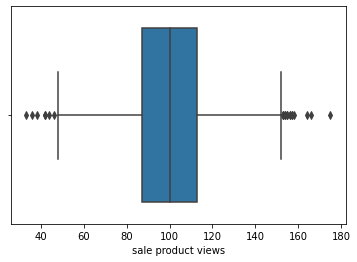

In [21]:
sns.boxplot(x=df['sale product views'])

<AxesSubplot:xlabel='customer service calls'>

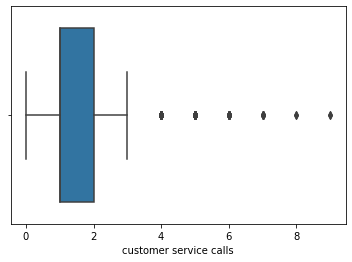

In [22]:
sns.boxplot(x=df['customer service calls'])

In [23]:
df[['sale product views', 'customer service calls', 'churn']].groupby('churn').mean()

,sale product views,customer service calls
churn,,
0,100.058246,1.449825
1,100.399586,2.229814


Even though the 'sale product views' does not have a strong effect on costumers to leave, however
'customer service calls' has a crucial effect on customers to leave the company. It is clear that the more the customer has to deal with the customer service calls, the more likely he or she is  going to leave the company.

<AxesSubplot:xlabel='discount rate per visited products', ylabel='Density'>

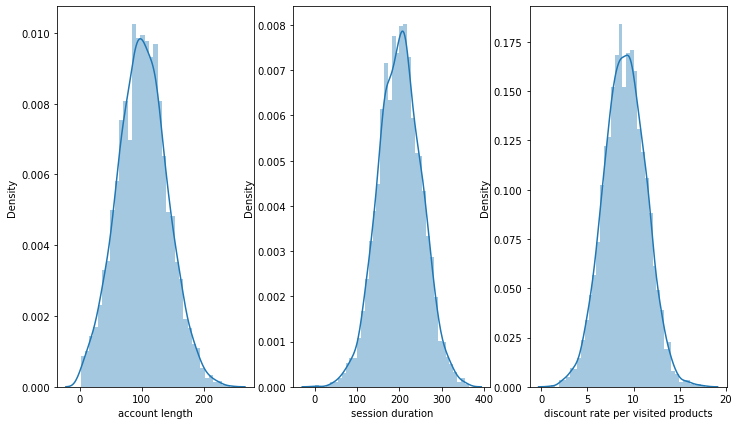

In [24]:
fig, axes = plt.subplots(1,3, figsize=(12, 7))
sns.distplot(df["account length"], ax=axes[0])
sns.distplot(df["session duration"], ax=axes[1])
sns.distplot(df["discount rate per visited products"], ax=axes[2])



Account length shows the period of time in which the customer account is actively used while the session duration indicates the
time period when the user active on the website. The all three features are normally distributed. 

In [25]:
df[['account length', 'session duration', 'discount rate per visited products', 'churn']].groupby('churn').mean()

,account length,session duration,discount rate per visited products
churn,,,
0,100.793684,199.102807,9.006074
1,102.664596,212.467909,9.235528


These three parameters seem to have a weak impact on customers to churn. Therefore, it may be considered that these variables might not be a perfect fit in order to use in the machine learning algorithms.

In [26]:
df[['desktop sessions', 'churn']].groupby('churn').mean()

,desktop sessions
churn,
0,175.213684
1,206.944099


'Desktop sessions' is another significant indicator of churn rate, so it might be important to include it in the model.

In [27]:
df.groupby('churn').mean()

,account length,location code,user id,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls
churn,,,,,,,,,,,,,,,,,
0,100.793684,437.074737,3.745643e+06,8.604561,175.213684,29.787018,16.924211,100.283158,199.102807,100.034386,200.133193,100.058246,9.006074,10.158877,4.532982,2.743404,1.449825
1,102.664596,437.817805,3.750114e+06,5.115942,206.944099,35.175983,18.051760,101.335404,212.467909,100.561077,205.231677,100.399586,9.235528,10.700000,4.163561,2.889545,2.229814


##### Feature Selection

In [28]:
df = df.drop(['user id'], axis= 1)

Since the 'user id' feature is too unique and weak in terms of predictional power, I decided to drop it and not to include it in the model. 

In [29]:
df = df.drop(columns = ['location code','promotion clicks','sale product views','add to cart per session','product detail view per app session','discount rate per visited products', 'app transactions'], axis= 1)

I've decided to drop 'location code','promotion clicks','sale product views','add to cart per session','product detail view per app session','discount rate per visited products', 'app transactions' features
since they add little or no informative power to the model.

In [30]:
# Creating dummy using the categorical variables for encoding 
cat_vars = df.select_dtypes(include=['object']).copy().columns
for var in  cat_vars:
        # for each cat add dummy var, drop original column
    df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)

In [31]:
df.head()

,account length,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,avg order value,customer service calls,churn,credit card info save_yes,push status_yes
0,128,25,265,45,17,110,197,244.7,1,0,0,1
1,107,26,162,27,17,123,196,254.4,1,0,0,1
2,137,0,243,41,10,114,121,162.6,0,0,0,0
3,84,0,299,51,5,71,62,196.9,2,0,1,0
4,75,0,167,28,13,113,148,186.9,3,0,1,0


## Evaluation & Deployment

In [32]:
X = df.drop(columns=['churn'])
X.head()

,account length,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,avg order value,customer service calls,credit card info save_yes,push status_yes
0,128,25,265,45,17,110,197,244.7,1,0,1
1,107,26,162,27,17,123,196,254.4,1,0,1
2,137,0,243,41,10,114,121,162.6,0,0,0
3,84,0,299,51,5,71,62,196.9,2,1,0
4,75,0,167,28,13,113,148,186.9,3,1,0


In [33]:
y = df['churn']
df = df.drop(columns=['churn'])
y.head()

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

# Building Random Forest Model

In [34]:
feature_names = [f'feature {i}' for i in range(X.shape[1])]

## Train score = 0.6, Test score = 0.4

In [35]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size= 0.4, random_state= 42)

In [36]:
rf_model = rf = RandomForestClassifier(n_estimators=100, max_depth=20,
                              random_state=42)
rf_model.fit(train_X, train_y)
churn_preds = rf_model.predict(test_X)
score = rf_model.score(train_X, train_y)
score2 = rf_model.score(test_X, test_y)
print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  1.000
Test set accuracy:  0.915


In [37]:
rf_model.feature_importances_

array([0.07064261, 0.04021858, 0.17649266, 0.13871449, 0.07048222,
       0.06871092, 0.10629433, 0.08639924, 0.14676001, 0.06604515,
       0.0292398 ])

#### Feature Importances

<AxesSubplot:>

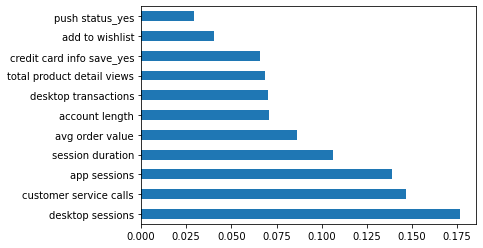

In [38]:
(pd.Series(rf_model.feature_importances_, index=X.columns)
   .nlargest(11)
   .plot(kind='barh')) 

## Train score = 0.8, Test score = 0.2

In [39]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [40]:
rf_model = rf = RandomForestClassifier(n_estimators=100, max_depth=20,
                              random_state=42)
rf_model.fit(train_X, train_y)
churn_preds = rf_model.predict(test_X)
score = rf_model.score(train_X, train_y)
score2 = rf_model.score(test_X, test_y)
print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  1.000
Test set accuracy:  0.922


In [41]:
rf_model.feature_importances_

array([0.06984032, 0.03787545, 0.17732388, 0.13785019, 0.068888  ,
       0.0651566 , 0.11505308, 0.08978995, 0.14212219, 0.07018872,
       0.02591162])

#### Feature Importances

<AxesSubplot:>

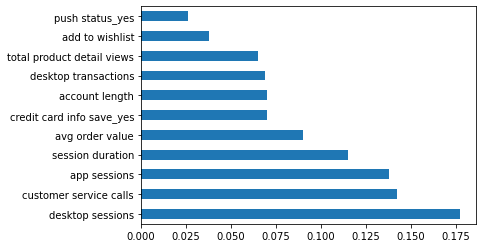

In [42]:
(pd.Series(rf_model.feature_importances_, index=X.columns)
   .nlargest(11)
   .plot(kind='barh')) 

### Interpratation of the results for RandomForest models

As it can be seen from the barcharts above, using RandomForest model with test_size of 0.2 and 0.4,
we concluded that the top 3 explanatory variables that have the most significant effect on the churn rate 
are 'desktop sessions', 'customer service calls' and 'app sessions'.

# Building Xgboost Model

## Train score = 0.6, Test score = 0.4

In [43]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size= 0.4, random_state= 42)

In [44]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic',
                              n_estimators=700,
                              learning_rate=0.03,
                              max_depth=16,   
                              gamma=0.25,
                              n_jobs= -1,
                              random_state= 42,
                              subsample=0.9,
                              min_child_weight=1)
xgb_model.fit(train_X, train_y)
# make predictions for test data
y_pred = xgb_model.predict(test_X)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(test_y, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[00:01:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 92.35%


In [45]:
xgb_model.feature_importances_

array([0.04570927, 0.12341689, 0.12490495, 0.03069632, 0.08248243,
       0.04791319, 0.08241624, 0.05693655, 0.17042723, 0.2350969 ,
       0.        ], dtype=float32)

#### Feature Importances

<AxesSubplot:>

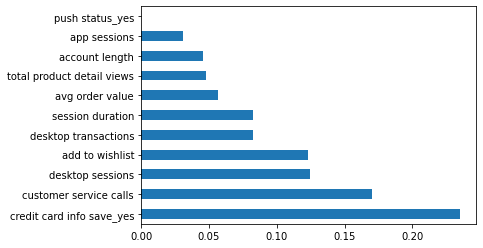

In [46]:
(pd.Series(xgb_model.feature_importances_, index=X.columns)
   .nlargest(11)
   .plot(kind='barh')) 

## Train score = 0.8, Test score = 0.2

In [47]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [48]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic',
                              n_estimators=700,
                              learning_rate=0.03,
                              max_depth=16,   
                              gamma=0.25,
                              n_jobs= -1,
                              random_state= 42,
                              subsample=0.9,
                              min_child_weight=1)
xgb_model.fit(train_X, train_y)
# make predictions for test data
y_pred = xgb_model.predict(test_X)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(test_y, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[00:01:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 92.20%


#### Feature Importances

<AxesSubplot:>

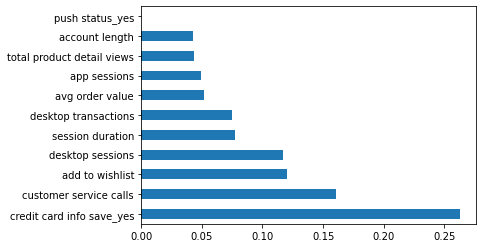

In [49]:
(pd.Series(xgb_model.feature_importances_, index=X.columns)
   .nlargest(11)
   .plot(kind='barh')) 

As it can be seen from the barcharts above, using xgboost models with test_size of 0.2 and 0.4, we concluded that the top 2 explanatory variables that have the  most significant effect on the churn rate 
are 'credit card info save' and, 'customer service calls'.

# Python Skills

In [50]:
xls = pd.ExcelFile('data2.xlsx')
df1 = pd.read_excel(xls, 'Public_Schools')
df2 = pd.read_excel(xls, 'School Type')
df3 = pd.read_excel(xls, 'Police')
df4 = pd.read_excel(xls, 'Company&Food Order')

In [51]:
df1.head()

,CITY,ZIPCODE,SCH_NAME,SCH_TYPE
0,East Boston,2128,Guild Elementary,ES
1,East Boston,2128,Kennedy Patrick Elem,ES
2,East Boston,2128,Otis Elementary,ES
3,East Boston,2128,O'Donnell Elementary,ES
4,East Boston,2128,East Boston High,HS


In [52]:
df2.head()

,Type,Long_Name
0,ES,Elementary
1,HS,High
2,K-8,Combined Elem/Mid
3,ELC,Early Learning
4,MS,Middle


In [53]:
df3.head()

,City,Officers per 10k population,officers,Employees per 10K population,employees,Population,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,"Agawam, Massachusetts",16.3,47,19.8,57,163000,NaN,1.0,Uninformed Officers
1,"Andover, Massachusetts",14.3,51,20.0,71,143000,NaN,2.0,Detectives
2,"Arlington, Massachusetts",14.7,66,18.7,84,147000,NaN,3.0,State Police
3,"Attleboro, Massachusetts",17.9,79,20.6,91,179000,NaN,4.0,Transit and Railroad Officers
4,"Barnstable, Massachusetts",25.7,113,29.1,128,257000,NaN,5.0,Sheriffs


In [54]:
df4.head()

,Date,Name,Company Name,City,Country,Currency,Food Type
0,2019-05-24,Rebecca,Interdum PC,L'Hospitalet de Llobregat,Italy,54.46,pasta
1,2019-04-29,Octavia,Sit Amet Institute,Dutse,Liberia,29.91,seafood
2,2019-08-13,Gwendolyn,Diam LLP,Cork,Libya,19.45,salads
3,2018-10-06,Fallon,Blandit Nam Nulla Corp.,Hamburg,"Palestine, State of",99.94,stews
4,2019-04-20,Harper,Eu Eros Nam Corporation,Kawawachikamach,Peru,99.31,cereals


##### Q1:Creating a sublist called 'city_list' using Public_School dataset

In [55]:
city_list = df1['CITY'].unique()
print(city_list)

['East Boston' 'Charlestown' 'Boston' 'Roxbury' 'Dorchester'
 'South Boston' 'West Roxbury' 'Mattapan' 'Roslindale' 'Jamaica Plain'
 'Hyde Park' 'Brighton' 'Allston']


In [56]:
df1.isna().any()

CITY        False
ZIPCODE     False
SCH_NAME    False
SCH_TYPE    False
dtype: bool

#### Q2:number of schools in each city

In [57]:
schools_per_city = df1['CITY'].value_counts()
schools_per_city

Dorchester       27
Roxbury          19
Boston           15
Jamaica Plain    12
East Boston      11
West Roxbury      7
Roslindale        7
Hyde Park         7
Brighton          7
Mattapan          6
South Boston      6
Charlestown       4
Allston           3
Name: CITY, dtype: int64

<AxesSubplot:>

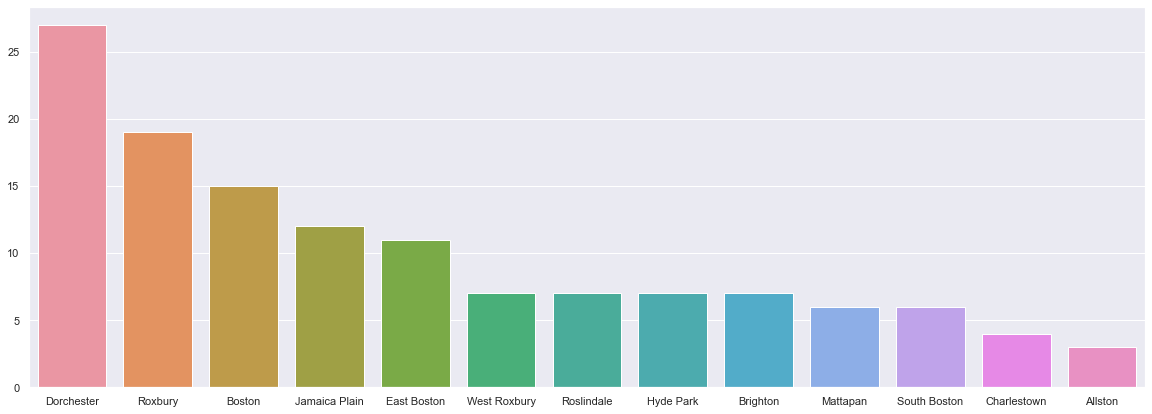

In [58]:
sns.set()
plt.rcParams['figure.figsize'] = [20, 7]
sns.barplot(x=schools_per_city.index, y=schools_per_city.to_numpy())

##### Q3:The post code of Hennigan K-8

In [59]:
Hennigan = df1[df1['SCH_NAME'].str.contains("Hennigan K-8")]
Hennigan

,CITY,ZIPCODE,SCH_NAME,SCH_TYPE
117,Jamaica Plain,2130,Hennigan K-8,K-8


#### Q4-Q5: Group by postcode and counting the zipcodes in Boston city

In [60]:
zipcodes = df1.groupby('CITY')['ZIPCODE'].count()
df_zipcodes = pd.DataFrame(zipcodes)
df_zipcodes

,ZIPCODE
CITY,
Allston,3
Boston,15
Brighton,7
Charlestown,4
Dorchester,27
East Boston,11
Hyde Park,7
Jamaica Plain,12
Mattapan,6


#### Q6: Fınding out why the dataframe consists of 4-digit zipcodes instead of 5-digit ones:
Answer: It is accurate that the zipcodes in U.S. are 5-digit numbers and this is also valid when we look at the dataset on Kaggle.
However, when the dataframe is downloaded as an excel file, the excel drops the '0' at the first digit of the zipcodes. 
That is why we have 4 digit numbers in our dataset.



##### Correction for 4 digit values on 'ZIPCODE' column:

In [61]:
df1['ZIPCODE'] = df1['ZIPCODE'].apply(lambda x: '{0:0>5}'.format(x))
df1

,CITY,ZIPCODE,SCH_NAME,SCH_TYPE
0,East Boston,02128,Guild Elementary,ES
1,East Boston,02128,Kennedy Patrick Elem,ES
2,East Boston,02128,Otis Elementary,ES
3,East Boston,02128,O'Donnell Elementary,ES
4,East Boston,02128,East Boston High,HS
...,...,...,...,...
126,Roxbury,02119,Higginson Elementary (K1-2),ES
127,East Boston,02128,Alighieri Montessori,ES
128,Boston,02116,Boston Adult Tech Acad,Special
129,Brighton,02135,Boston Green Academy,2006-07-12 00:00:00


##### Q7:Why do we see a date format at the last row of 'SCH_TYPE' in df1 ?

Answer: When we look at the original dataframe on Kaggle, we see '6/7-12' value at the and of 'SCH_TYPE' of the dataset.
The problem occurs when we import the dataset as in excel format. Since excel uses an algorithm that aims to
make it easier to enter dates into excel, it automaticallt converts the value '6/7-12' to a date format of '7/12/2006'.
It seems there is not a valid solution for this problem however using some alternative ways while importing the dataset,
this problem might be prevented.

##### df3 explaratory analysis before moving into correlation analysis

In [62]:
df3.shape

(75, 9)

In [63]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   City                          75 non-null     object 
 1   Officers per 10k population   75 non-null     float64
 2   officers                      75 non-null     int64  
 3   Employees per 10K population  75 non-null     float64
 4   employees                     75 non-null     int64  
 5   Population                    75 non-null     int64  
 6   Unnamed: 6                    0 non-null      float64
 7   Unnamed: 7                    6 non-null      float64
 8   Unnamed: 8                    6 non-null      object 
dtypes: float64(4), int64(3), object(2)
memory usage: 5.4+ KB


In [64]:
df3.describe()

,Officers per 10k population,officers,Employees per 10K population,employees,Population,Unnamed: 6,Unnamed: 7
count,75.000000,75.000000,75.000000,75.000000,75.000000,0.0,6.000000
mean,19.098667,126.213333,22.258667,149.866667,190986.666667,NaN,3.500000
std,4.265971,245.990787,5.028355,309.487691,42659.713679,NaN,1.870829
min,12.200000,39.000000,14.200000,45.000000,122000.000000,NaN,1.000000
25%,16.050000,51.500000,18.700000,59.500000,160500.000000,NaN,2.250000
50%,18.200000,75.000000,21.100000,88.000000,182000.000000,NaN,3.500000
75%,21.750000,116.500000,24.550000,131.000000,217500.000000,NaN,4.750000
max,31.500000,2125.000000,39.700000,2678.000000,315000.000000,NaN,6.000000


In [65]:
df3.isna().any()

City                            False
Officers per 10k population     False
officers                        False
Employees per 10K population    False
employees                       False
Population                      False
Unnamed: 6                       True
Unnamed: 7                       True
Unnamed: 8                       True
dtype: bool

#### Dropping problematic columns that have no name

In [66]:
df3 = df3.drop(columns = ['Unnamed: 6','Unnamed: 7','Unnamed: 8'])
df3.head()

,City,Officers per 10k population,officers,Employees per 10K population,employees,Population
0,"Agawam, Massachusetts",16.3,47,19.8,57,163000
1,"Andover, Massachusetts",14.3,51,20.0,71,143000
2,"Arlington, Massachusetts",14.7,66,18.7,84,147000
3,"Attleboro, Massachusetts",17.9,79,20.6,91,179000
4,"Barnstable, Massachusetts",25.7,113,29.1,128,257000


In [67]:
df3.dtypes

City                             object
Officers per 10k population     float64
officers                          int64
Employees per 10K population    float64
employees                         int64
Population                        int64
dtype: object

#### Q8: Correlation Analysis for Police dataset

In [68]:
correlations = df3.corr()
correlations

,Officers per 10k population,officers,Employees per 10K population,employees,Population
Officers per 10k population,1.000000,0.489196,0.942033,0.477221,1.000000
officers,0.489196,1.000000,0.552765,0.999250,0.489196
Employees per 10K population,0.942033,0.552765,1.000000,0.550630,0.942033
employees,0.477221,0.999250,0.550630,1.000000,0.477221
Population,1.000000,0.489196,0.942033,0.477221,1.000000


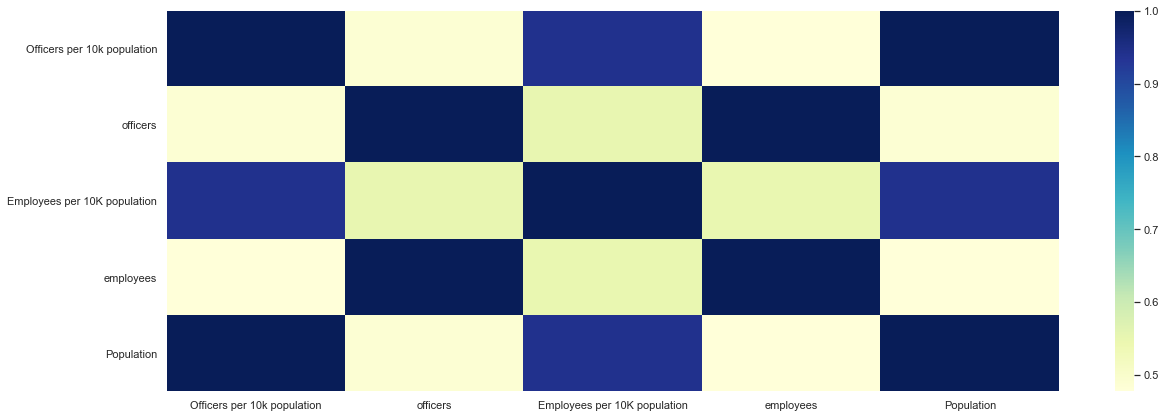

In [69]:
sns.heatmap(correlations, cmap="YlGnBu")
plt.show()

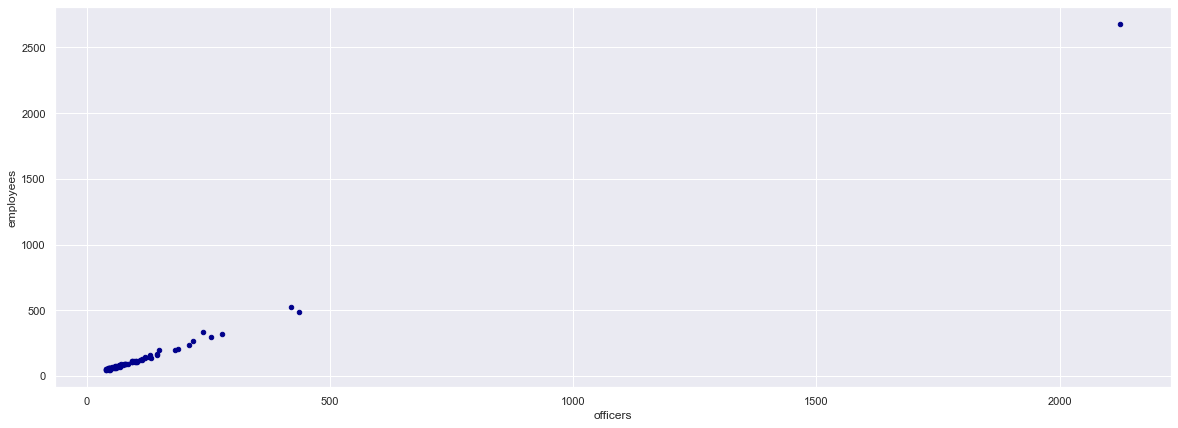

In [70]:
corr_of_emp = df3.plot.scatter(x='officers',
                      y='employees',
                      c='DarkBlue')

#### There is a positive correlation between 'officers' and 'employees' as can bee seen from the graph above. Meaning that they have a positive relationship in which an increase in employers leads to an increase in officers and vice versa.

#### Q9: Finding out the most demanded goods on df4 dataset

In [71]:
#Exploration of the dataset
df4.head()

,Date,Name,Company Name,City,Country,Currency,Food Type
0,2019-05-24,Rebecca,Interdum PC,L'Hospitalet de Llobregat,Italy,54.46,pasta
1,2019-04-29,Octavia,Sit Amet Institute,Dutse,Liberia,29.91,seafood
2,2019-08-13,Gwendolyn,Diam LLP,Cork,Libya,19.45,salads
3,2018-10-06,Fallon,Blandit Nam Nulla Corp.,Hamburg,"Palestine, State of",99.94,stews
4,2019-04-20,Harper,Eu Eros Nam Corporation,Kawawachikamach,Peru,99.31,cereals


In [72]:
df4.shape

(300, 7)

In [73]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          300 non-null    datetime64[ns]
 1   Name          300 non-null    object        
 2   Company Name  300 non-null    object        
 3   City          300 non-null    object        
 4   Country       300 non-null    object        
 5   Currency      300 non-null    float64       
 6   Food Type     300 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 16.5+ KB


In [74]:
df4.isna().any()

Date            False
Name            False
Company Name    False
City            False
Country         False
Currency        False
Food Type       False
dtype: bool

In [75]:
df4.describe()

,Currency
count,300.000000
mean,50.467867
std,28.175241
min,0.170000
25%,26.735000
50%,52.005000
75%,71.770000
max,99.940000


#### The most demanded good seems to be soup with quantity demanded of 39.

In [76]:
df4['Food Type'].value_counts()

soups         39
cereals       37
desserts      33
stews         31
salads        30
pasta         30
sandwiches    27
seafood       27
pies          26
noodles       20
Name: Food Type, dtype: int64

#### The most expensive good seems to be cereals in terms of average price.

In [77]:
gr_food = df4.groupby('Food Type')['Currency'].mean()
gr_food

Food Type
cereals       54.760000
desserts      45.292727
noodles       50.730500
pasta         44.993667
pies          45.037692
salads        47.639667
sandwiches    54.358889
seafood       57.213333
soups         48.799744
stews         56.108065
Name: Currency, dtype: float64

#### In terms of price, seafood products seem to be the most expensive.

In [78]:
gr_food = pd.DataFrame(gr_food)
gr_food.sort_values(by = 'Currency', ascending = False)

,Currency
Food Type,
seafood,57.213333
stews,56.108065
cereals,54.760000
sandwiches,54.358889
noodles,50.730500
soups,48.799744
salads,47.639667
desserts,45.292727
pies,45.037692


# Algorithm Skills

##### Algorithm that counts the biggest number of 3 inputs using if/else statement

In [79]:
def biggest(x, y, z):
  
    if isinstance(x, (float,int)) and isinstance(y, (float,int)) and isinstance(z,(float,int)):
    
        if (x >= y) and (x >= z):
            biggest = x

        elif (y >= x) and (y >= z):
            biggest = y
        else:
            biggest = z
          
    else:
        print("Please type in float")
        
    return biggest

In [80]:
biggest(1,2,3)

3

In [81]:
biggest(0.3452, 0.345233333333333333333333333333333333333333, 0.011111111)

0.34523333333333334

#### Preparation of df3 dataset before implementing the algorithm(Vowel_counter)

In [82]:
df3.head()

,City,Officers per 10k population,officers,Employees per 10K population,employees,Population
0,"Agawam, Massachusetts",16.3,47,19.8,57,163000
1,"Andover, Massachusetts",14.3,51,20.0,71,143000
2,"Arlington, Massachusetts",14.7,66,18.7,84,147000
3,"Attleboro, Massachusetts",17.9,79,20.6,91,179000
4,"Barnstable, Massachusetts",25.7,113,29.1,128,257000


#### Vowel_counter algorithm

In [83]:
vowels = set("AEIOUaeiou")

df3['Vowel_counter'] = [sum(1 for c in x if c in vowels) for x in df3['City']]
df3['Vowel_counter']

0     7
1     7
2     7
3     8
4     7
     ..
70    8
71    7
72    7
73    6
74    7
Name: Vowel_counter, Length: 75, dtype: int64

# Social Science Skills

#### Answers:


The factors that are likely to affect the demand of a good in e-commerce:

1.Price: Establishing a competitive price will be count as the first indicator of any e-commerce sales as there are
lots of e-commerce businesses online and many customers often use price-comparison sites before moving into purchasing a spesific
product today. So the price is the main indicator for an e-commerce enterprise's sales.

2.Shipping: Since we live in a world in which the things are being developed so rapidly, customers are more likely to expect fast
 and lower-cost shipping opportunities and this feature has a crucial effect on demand of a product that is being sold online.
 The faster the shipping, and the lower the cost of shipping, the higher the demand for the e-commerce sales.

3.Product reviews: Today, people have the chance of reviewing the product before actually using it thanks to comments and
shares about the product by the people first bought and use it and share their experience with it on the product page. Hence,
the consumers see this part(product reviews) as an important indicator that gives insgihts about the quality of that product,
so, the more good experiences shared on the comments, the more likely for costumers to make the purchase for the product

4.Return and refund policy: Most of the e-commerce enterprises use this policy in order to keep their customers loyal and
happy for their purchases online. In this regard, today, it is almost impossible for an e-commerce business to keep competitive
among the others without implementing a trusted return and refund policy for its customers.

5.Web Design&Algorithm: The design of an e-commerce website is so crucial to catch the customers' attention into the right product.
If an e-commerce site managed to sort the products using a personalization algorithm for each customer, then it is more likely
for that customer to make purchase on the products that algorithm brings in front of her/him.

## Thank you